# Data Science: análise de series temporais

# **Alucar - Analisando as vendas**

In [ ]:
import pandas as pd

alucar = pd.read_csv('alucar.csv')

In [ ]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
# Verificando a quantidade de linhas e colunas com o metodo shape
print('Quantidade de linhas e colunas é: ', alucar.shape)

Quantidade de linhas e colunas é:  (24, 2)


In [ ]:
# Verificando se existem valores null no data com o metodo isna
# Agrupando as duas colunas com dois metodos sum()
print('Quantidade de valores nulos: ', alucar.isna().sum().sum())

Quantidade de valores nulos:  0


In [ ]:
# Verificando os tipos de dados no dataset com o dtypes

alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:

# Como vamos trabalhar com time series, é preciso converter o coluna mes para datetime
# Com o metodo to_datetime do pandas
alucar.mes = pd.to_datetime(alucar['mes'])

In [ ]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Verificando versão do seaborn
print(sns.__version__)

0.11.2


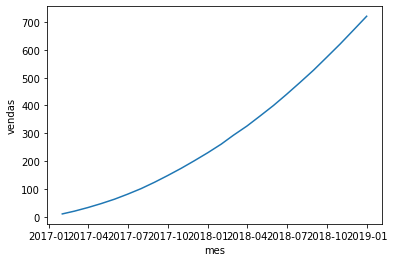

In [ ]:
# Plotando nosso dataset com o lineplot.
sns.lineplot(x= 'mes', y='vendas', data=alucar)

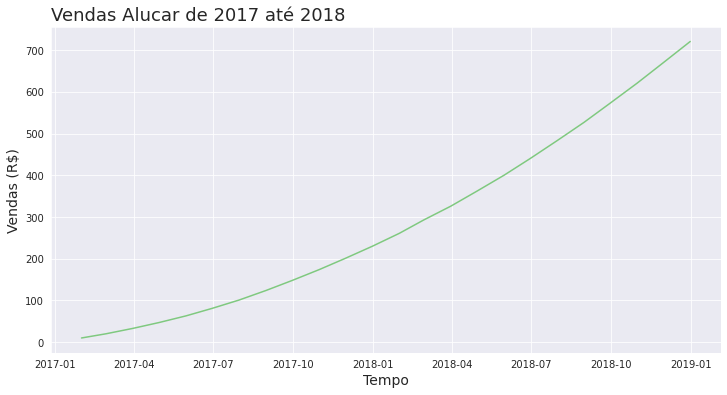

In [ ]:
sns.set_palette('Accent') # Configura o Palette
sns.set_style('darkgrid') # Configura o style do grafico
ax = sns.lineplot(x='mes', y='vendas', data=alucar) # Atribui o grafico a uma variável
ax.figure.set_size_inches(12,6) # Configura o tamanho da figura x,y
ax.set_xlabel('Tempo', fontsize=14) # Configura o tamanho da label x
ax.set_ylabel('Vendas (R$)', fontsize=14) # Configura o tamanho da label y
ax.set_title('Vendas Alucar de 2017 até 2018', fontsize=18, loc='left') # Configura o titulo, tamanho do titulo e localização do titulo
ax = ax

In [ ]:
# Criando uma nova coluna ao dataset com o metodo diff, que pega por padrão a diferença da linha atual com a linha anterior.
# No exemplo estamo decomponto as vendas, para ver seu aumento ou diminuição de um mês para o outro.
alucar['aumento'] = alucar.vendas.diff() 
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [ ]:
# Configurando todo o gráfico em uma função.
def plotar(titulo, xlabel, ylabel, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel, fontsize=14)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax = ax


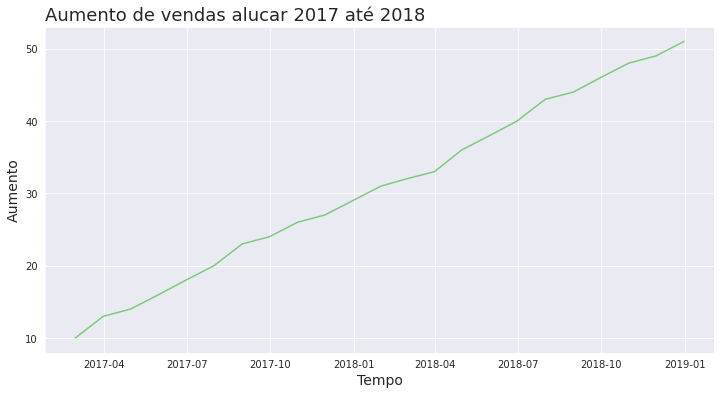

In [ ]:
plotar('Aumento de vendas alucar 2017 até 2018', 'Tempo', 'Aumento',
      'mes', 'aumento', alucar)

In [ ]:
# Criando uma nova coluna ao dataset com o metodo diff, que pega por padrão a diferença da linha atual com a linha anterior.
# No exemplo estamo decomponto mais uma vez o dataset pela coluna aumento, para ver sua aceleração de um mês para o outro.
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


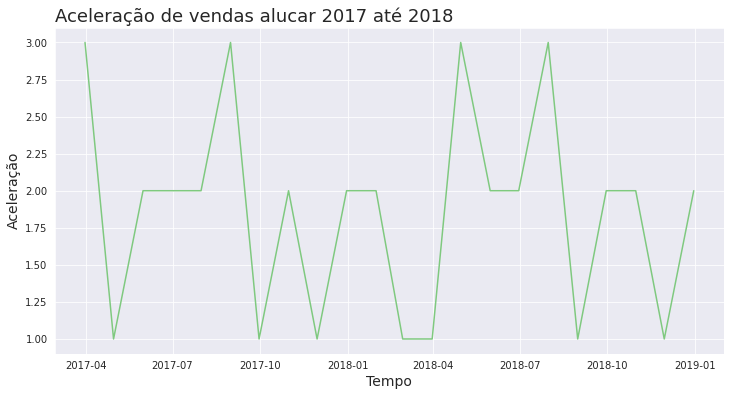

In [ ]:
plotar('Aceleração de vendas alucar 2017 até 2018', 'Tempo', 'Aceleração',
      'mes', 'aceleracao', alucar)

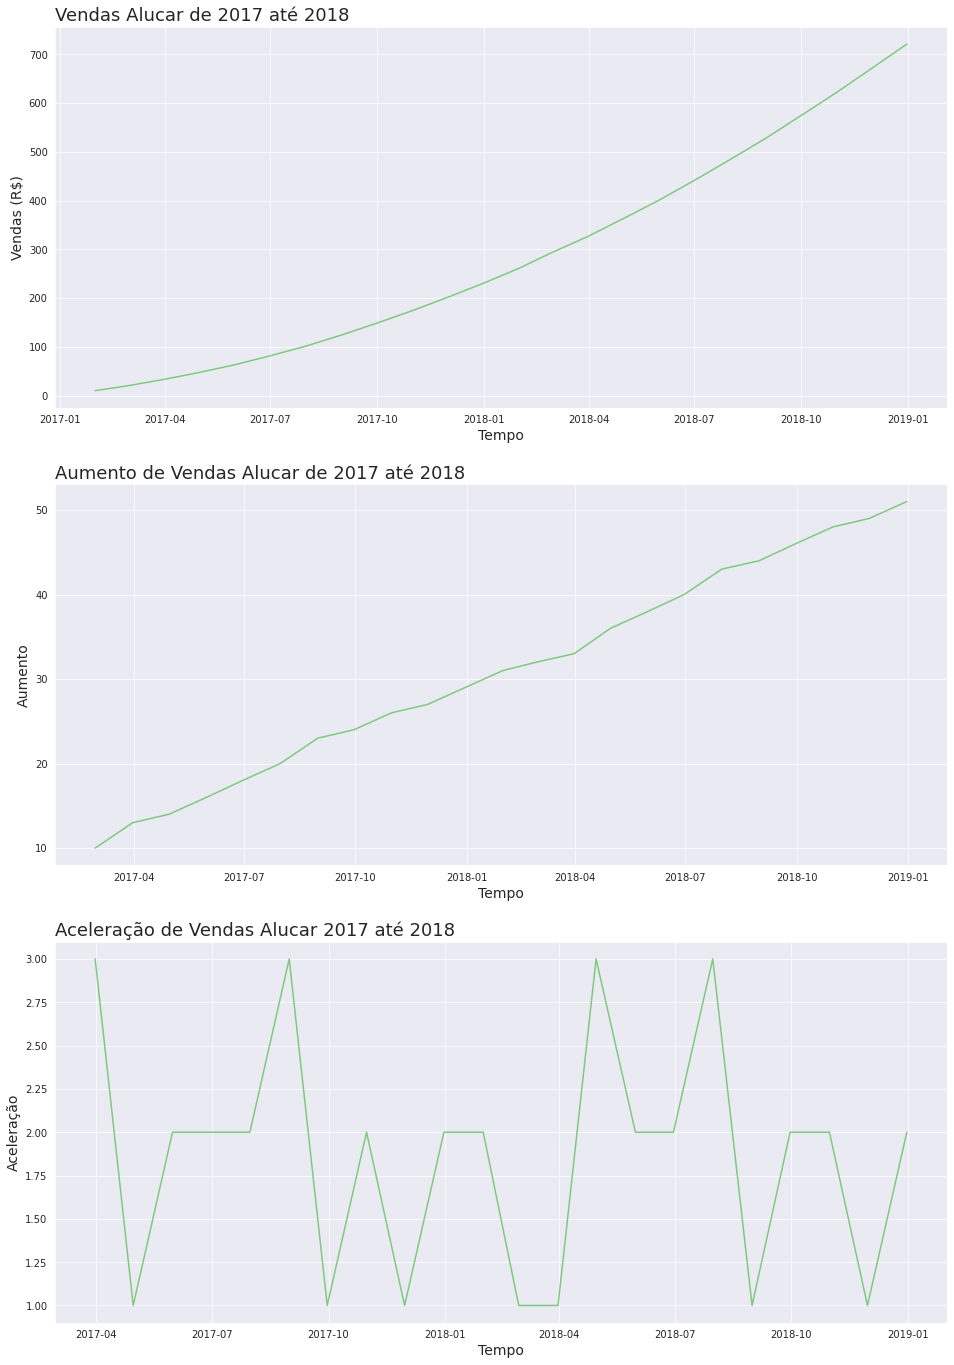

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
ax =sns.lineplot(x='mes', y='vendas', data=alucar)
ax.set_title('Vendas Alucar de 2017 até 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)

plt.subplot(3,1,2)
plt.subplots_adjust(bottom=0.5, top=2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.set_title('Aumento de Vendas Alucar de 2017 até 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax.set_title('Aceleração de Vendas Alucar 2017 até 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aceleração', fontsize=14)
ax = ax

In [ ]:
def comparacao(x , y1, y2, y3, dataset, titulo1, titulo2, titulo3, xlabel, ylabel1, ylabel2, ylabel3):
  plt.figure(figsize=(16,12))
  plt.subplot(3,1,1)
  
  ax = sns.lineplot(x=x , y= y1, data=dataset)
  ax.set_title(titulo1, fontsize=18, loc='left')
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel1, fontsize=14)
  plt.subplots_adjust(bottom=0.9, top=1.2)

  plt.subplot(3,1,2)
  ax = sns.lineplot(x=x, y=y2, data=dataset)
  ax.set_title(titulo2, loc='left', fontsize=18)
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel2, fontsize=14)
  plt.subplots_adjust(bottom=0.9, top=1.2)

  plt.subplot(3,1,3)
  ax = sns.lineplot(x=x, y=y3, data=dataset)
  ax.set_title(titulo3, loc='left', fontsize=18)
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel3, fontsize=14)

  plt.subplots_adjust(bottom=0.5, top=2)
  ax = ax

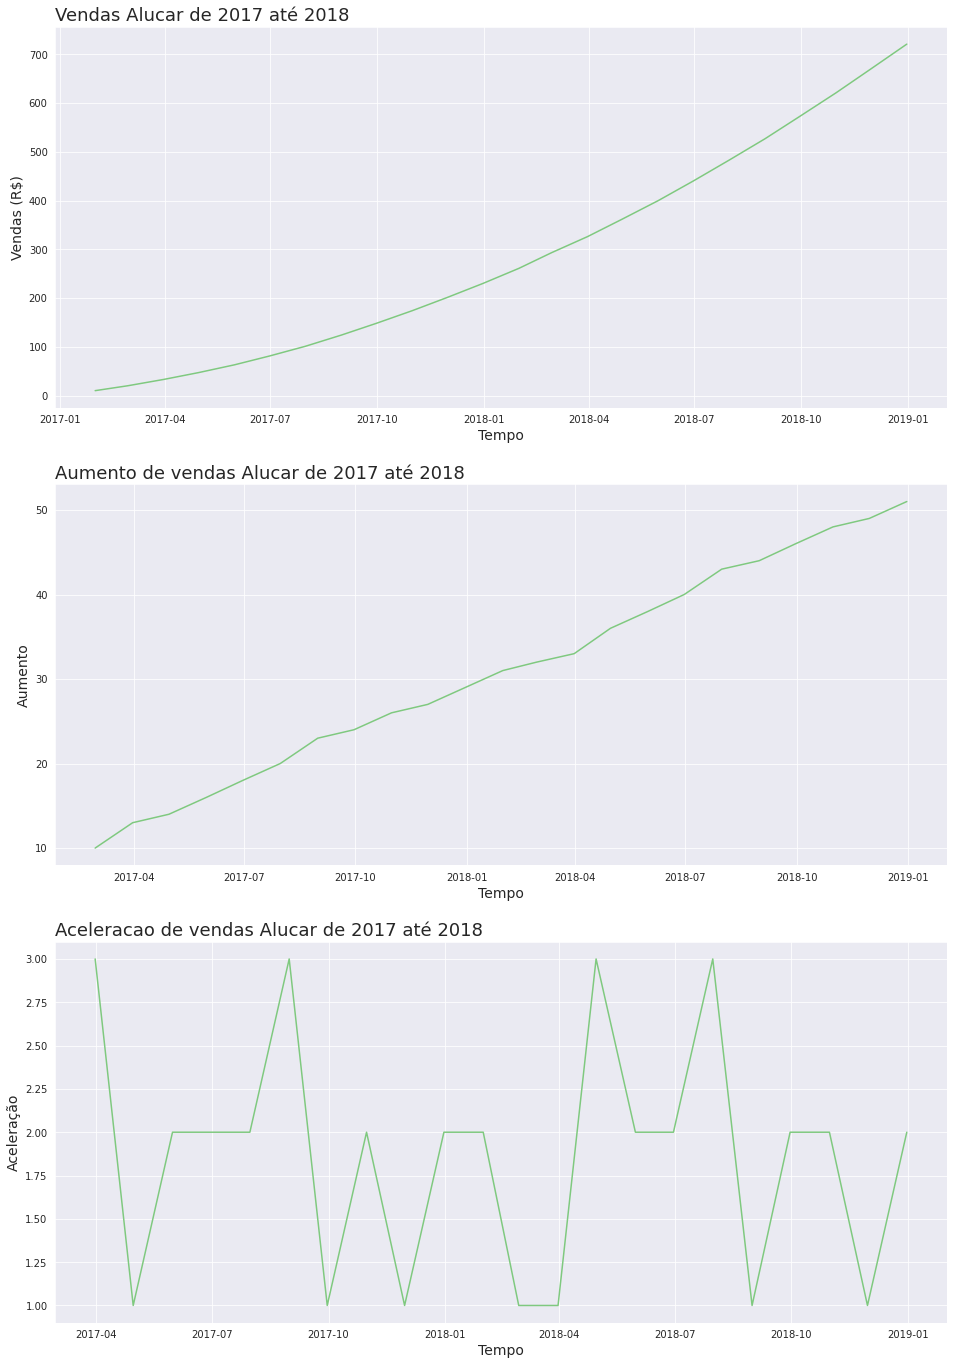

In [ ]:
comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar,
           'Vendas Alucar de 2017 até 2018', 'Aumento de vendas Alucar de 2017 até 2018',
           'Aceleracao de vendas Alucar de 2017 até 2018', 'Tempo',
           'Vendas (R$)', 'Aumento', 'Aceleração')

In [ ]:
from pandas.plotting import autocorrelation_plot

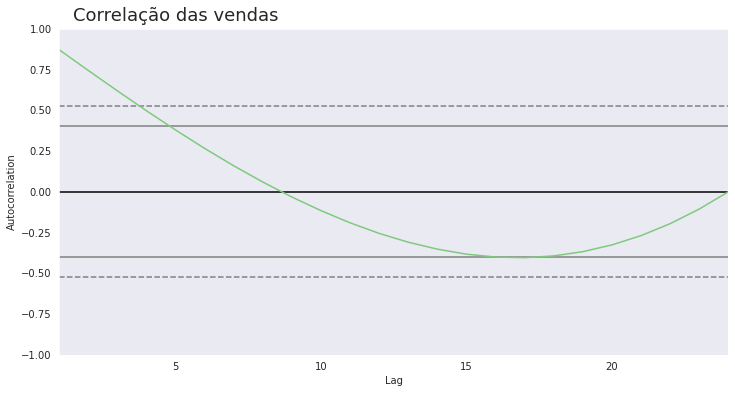

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26,y=0.93)
autocorrelation_plot(alucar.vendas)
ax = ax

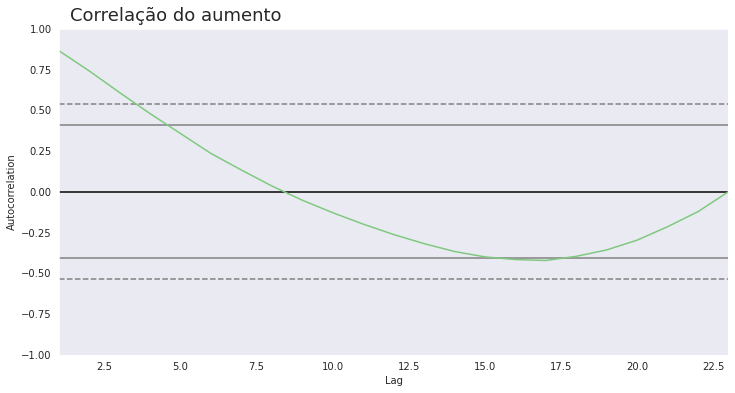

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26,y=0.93)
autocorrelation_plot(alucar.aumento[1:])
ax = ax

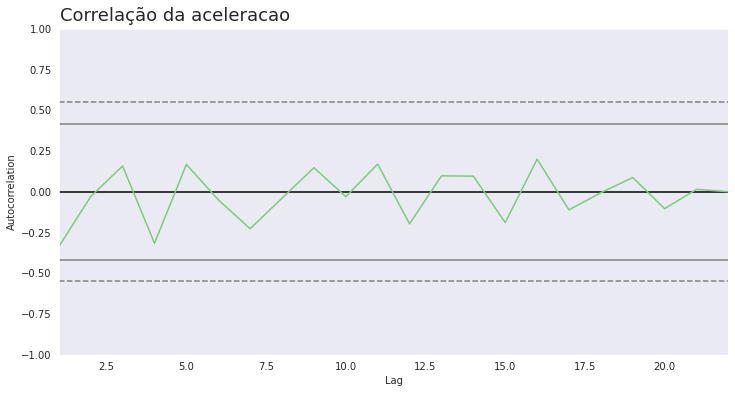

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao', fontsize=18, x=0.26,y=0.93)
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de valores nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de valores nulos:  0


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

In [ ]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


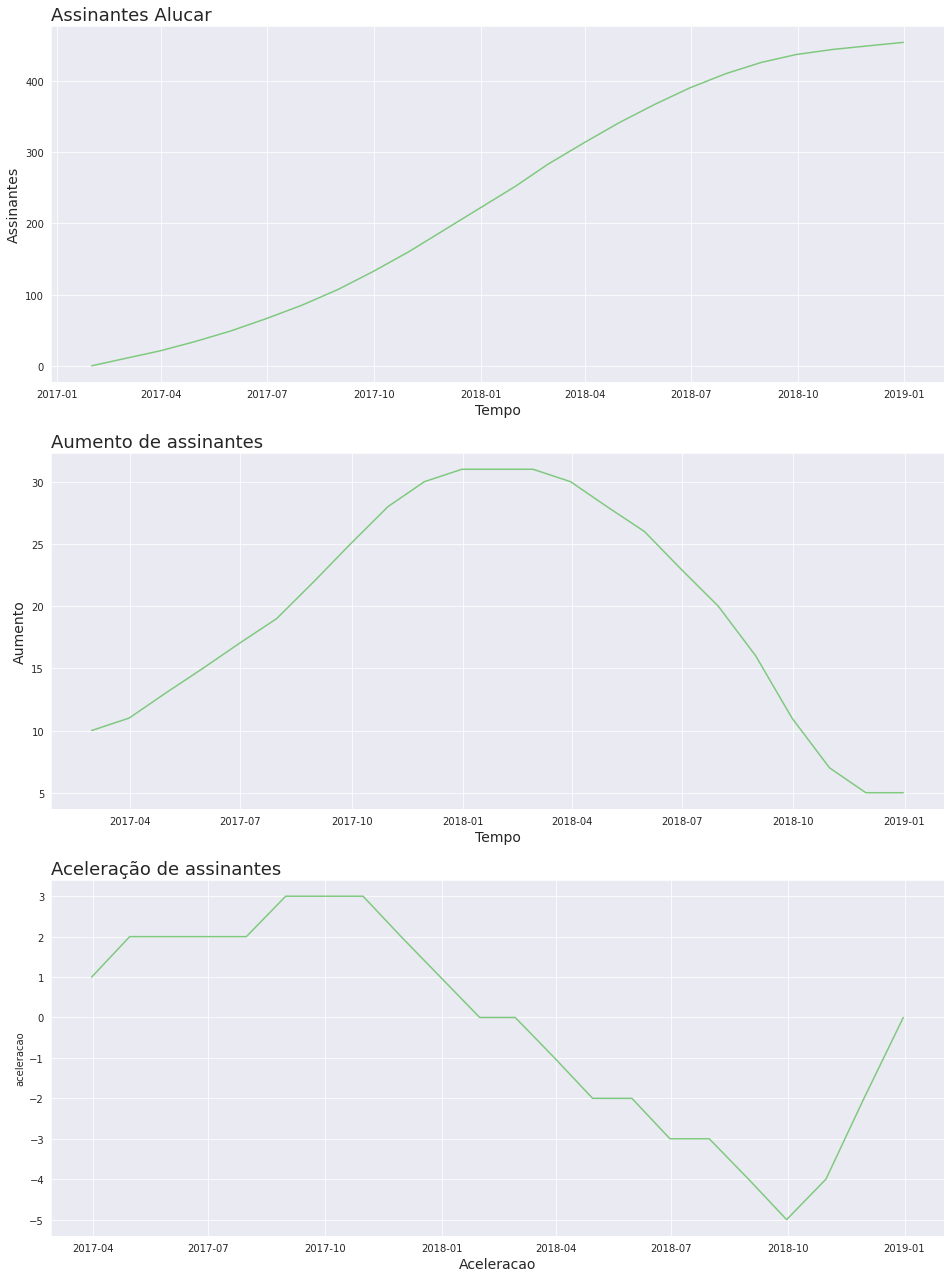

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)

ax = sns.lineplot(x='mes', y='assinantes', data=assinantes)
ax.set_title('Assinantes Alucar', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Assinantes', fontsize=14)
ax = ax

plt.subplots_adjust(bottom=0.9, top=2.3)

plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=assinantes)
ax.set_title('Aumento de assinantes', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax 

plt.subplots_adjust(bottom=0.9, top=2.3)

plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=assinantes)
ax.set_title('Aceleração de assinantes', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_xlabel('Aceleracao', fontsize=14)
ax = ax

# Chocolura - Analisando as vendas

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas: ', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [ ]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


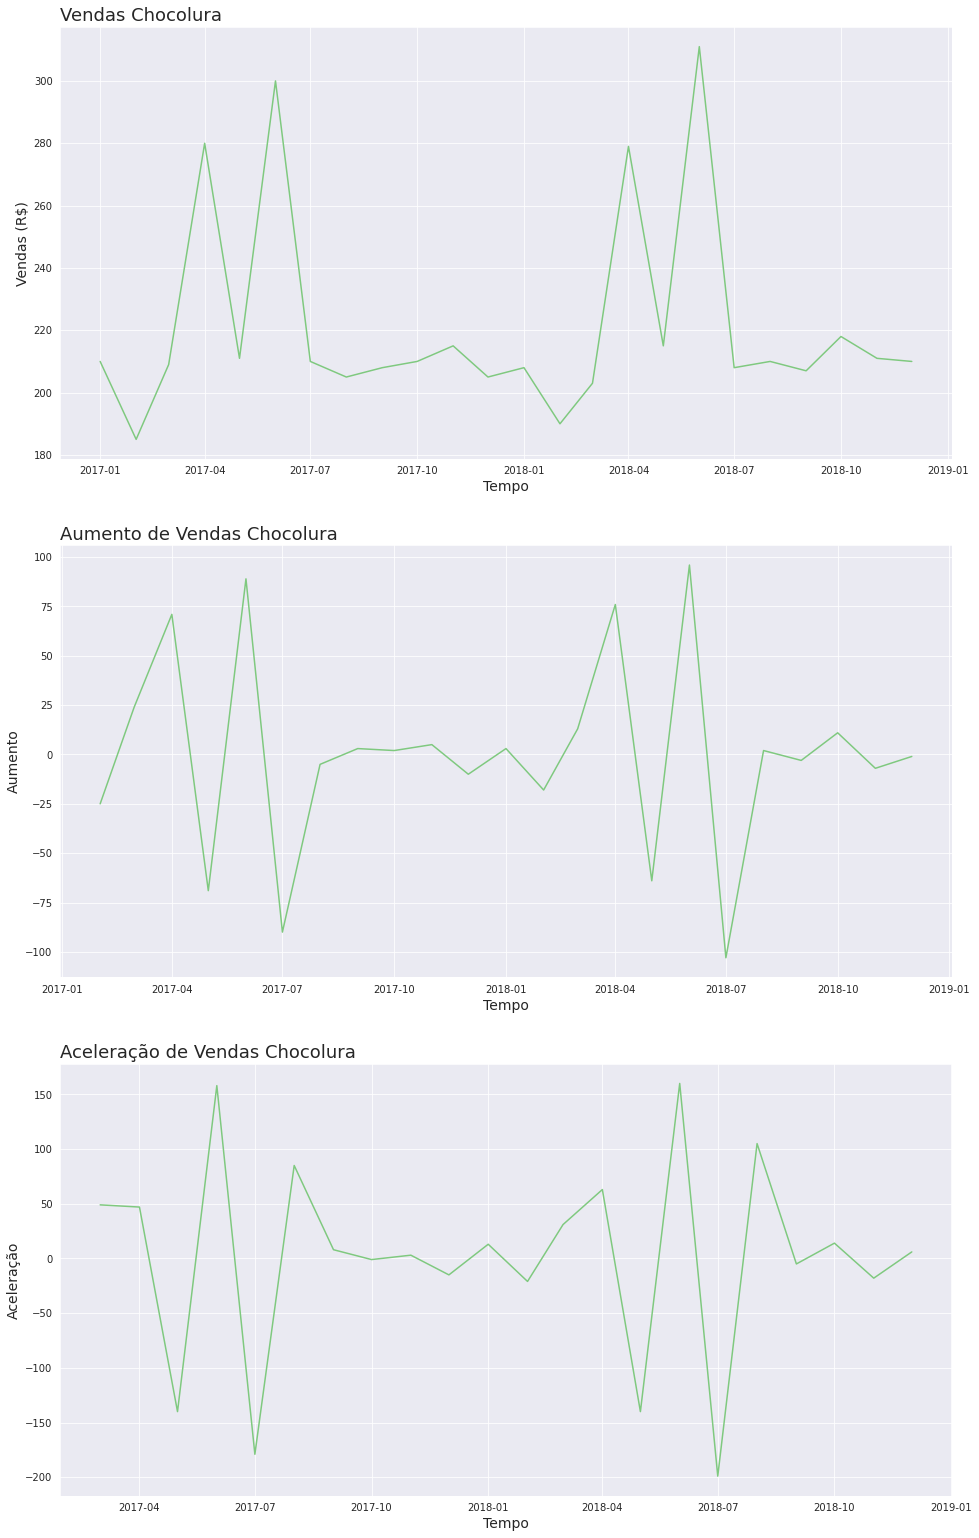

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)

ax = sns.lineplot(x='mes', y='vendas', data=chocolura)
ax.set_title('Vendas Chocolura', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax 
plt.subplots_adjust(bottom=0.9, top=2.6)

plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=chocolura) 
ax.set_title('Aumento de Vendas Chocolura', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax
plt.subplots_adjust(bottom=0.9, top=2.6)

plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=chocolura)
ax.set_title('Aceleração de Vendas Chocolura', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aceleração', fontsize=14)
ax = ax

No gráfico acima podemos encontrar algo muito interessante em relação a time series, que é a sazonalidade.

# Chocolura - Vendas diárias (Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
vendas_por_dia.dtypes


dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


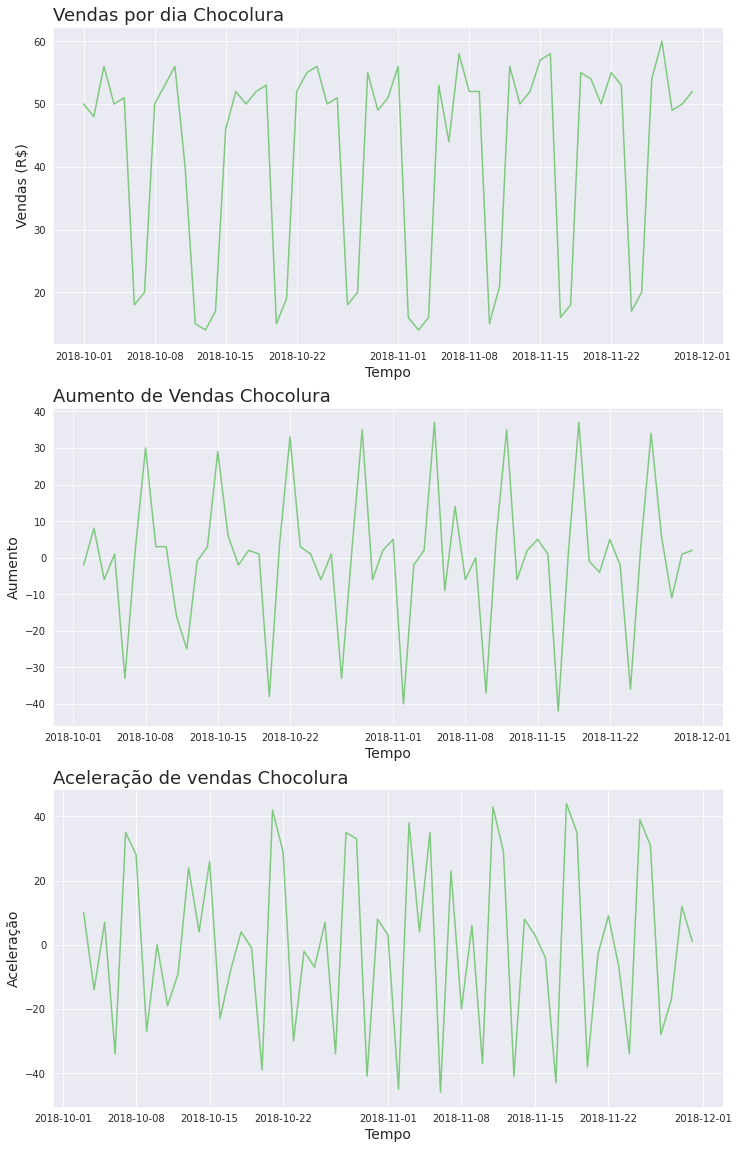

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)

ax = sns.lineplot(x='dia', y='vendas', data=vendas_por_dia)
ax.set_title('Vendas por dia Chocolura', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

plt.subplots_adjust(bottom=0.1, top=2.6)
plt.subplot(3,1,2)

ax = sns.lineplot(x='dia', y='aumento', data=vendas_por_dia)
ax.set_title('Aumento de Vendas Chocolura', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

plt.subplots_adjust(bottom=0.1, top=2.6)
plt.subplot(3,1,3)

ax = sns.lineplot(x='dia', y='aceleracao', data=vendas_por_dia)
ax.set_title('Aceleração de vendas Chocolura', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aceleração', fontsize=14)
ax = ax

In [ ]:
# Adicionando ao dataset a coluna dia da semana para analisar e entender os dias com menos vendas
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
# Verificando valores unicos da coluna dia_da_semana
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
# Criando um dicionario para traduzir os dias
dias_traduzidos= {'Monday': 'Segunda', 'Tuesday': 'Terca', 'Wednesday': 'Quarta', 
                'Thursday':'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sabado', 'Sunday': 'Domingo'}

In [ ]:
# Mapeando os dias da semana, pelos duas traduzidos
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


In [ ]:
# Agrupando os valores do dataset por dia da semana e tirando suas respectivas médias (vendas, aumento, aceleração)
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

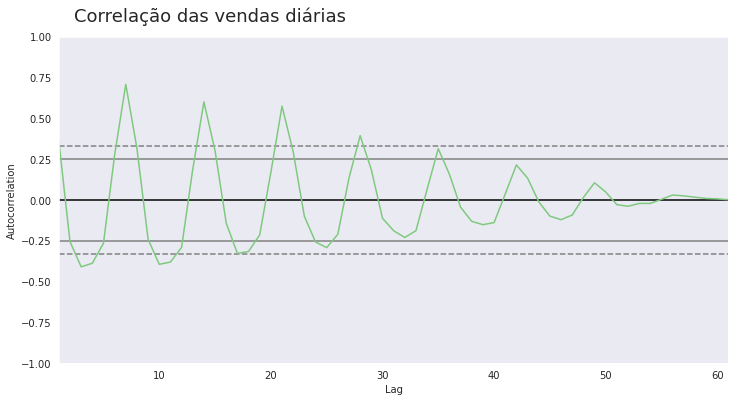

In [ ]:
ax = plt.figure(figsize=(12,6))
plt.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia.vendas)
ax = ax

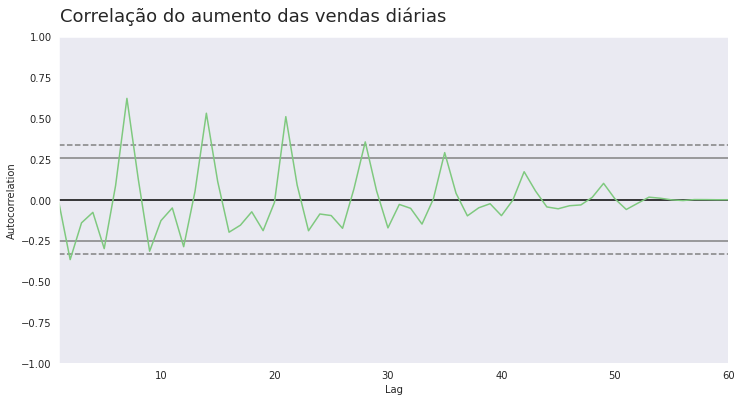

In [ ]:
ax = plt.figure(figsize=(12,6))
plt.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia.aumento[1:])
ax = ax 

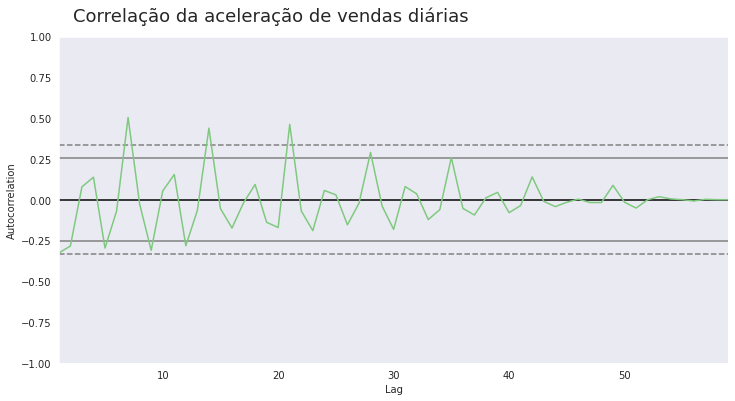

In [ ]:
ax = plt.figure(figsize=(12,6))
plt.suptitle('Correlação da aceleração de vendas diárias', fontsize=18, x=0.37, y=0.95)
autocorrelation_plot(vendas_por_dia.aceleracao[2:])
ax = ax 

# Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas: ', cafelura.shape)
print('Quantidade de valores nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de valores nulos:  0


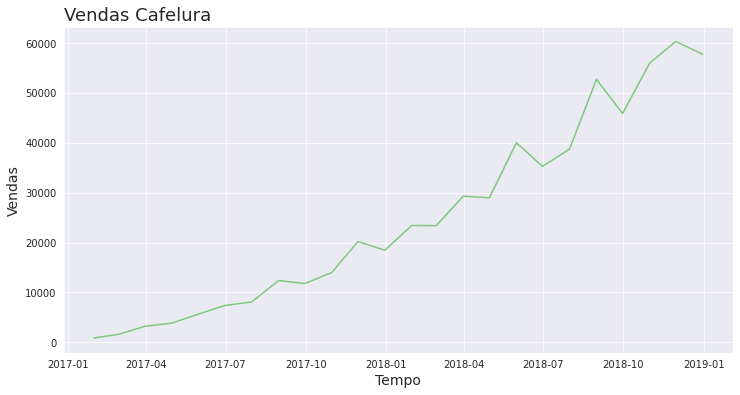

In [ ]:
ax = plt.figure(figsize=(12,6))
ax = sns.lineplot(x='mes', y='vendas', data=cafelura)
ax.set_title('Vendas Cafelura', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)

ax = ax 

In [ ]:
dias_final_semana = pd.read_csv('dias_final_de_semana.csv')
dias_final_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
dias_final_semana.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas'] = cafelura.vendas / dias_final_semana.quantidade_de_dias.values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


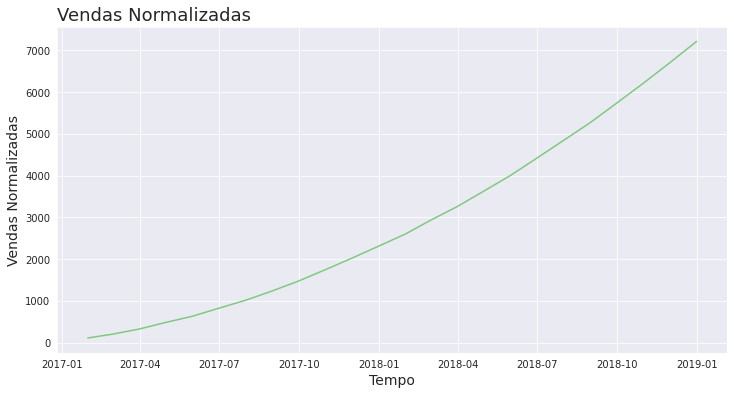

In [ ]:
ax = plt.figure(figsize=(12,6))
ax = sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax.set_title('Vendas Normalizadas', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas Normalizadas', fontsize=14)
ax=ax

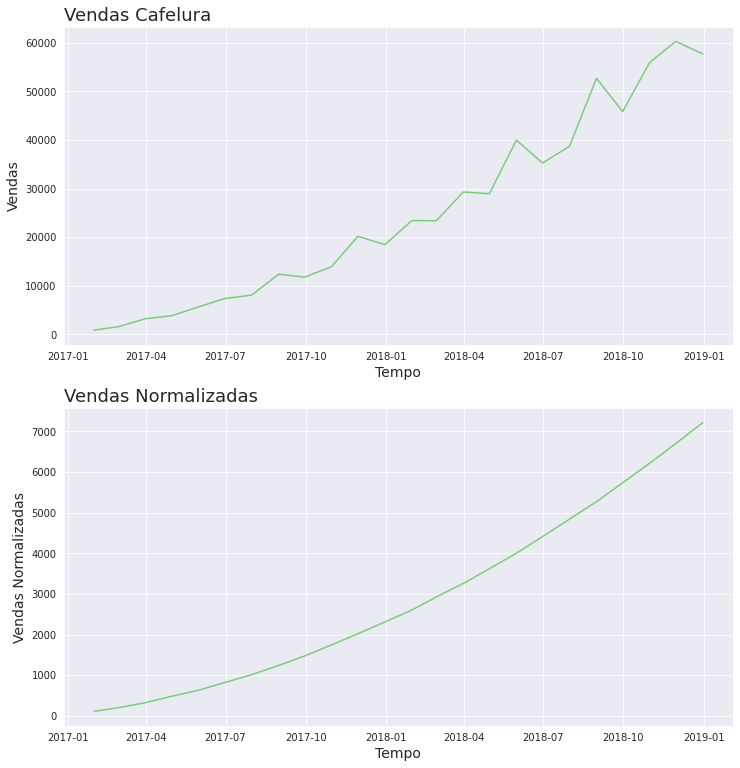

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)

ax = sns.lineplot(x='mes', y='vendas', data=cafelura)
ax.set_title('Vendas Cafelura', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax = ax

plt.subplots_adjust(bottom=0.1, top=2.6)
plt.subplot(3,1,2)

ax = sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax.set_title('Vendas Normalizadas', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas Normalizadas', fontsize=14)
ax=ax

# Statsmodels

In [ ]:
# Para identificarmos Tendencia, Sazonalidade e Ruidos, temos a seguinte função que precisa ser importada
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


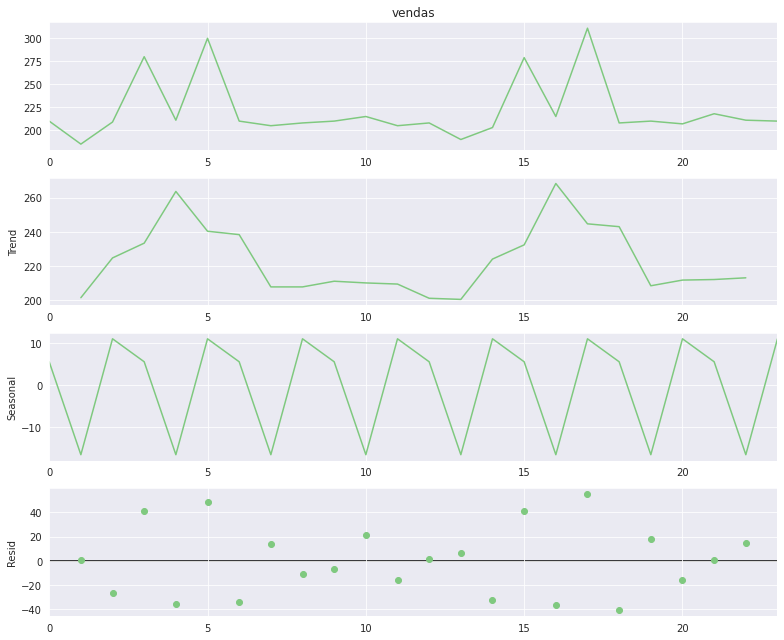

In [ ]:
# Para que ele possa fazer a decomposição, precisamos passar uma lista pra ele.
resultado = seasonal_decompose(chocolura['vendas'], freq=3) 
ax = resultado.plot()


In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
dataset = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(dataset)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


# Alucel - Análise de Vendas

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidade de valores nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de valores nulos:  0


In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel.aumento.diff()

alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


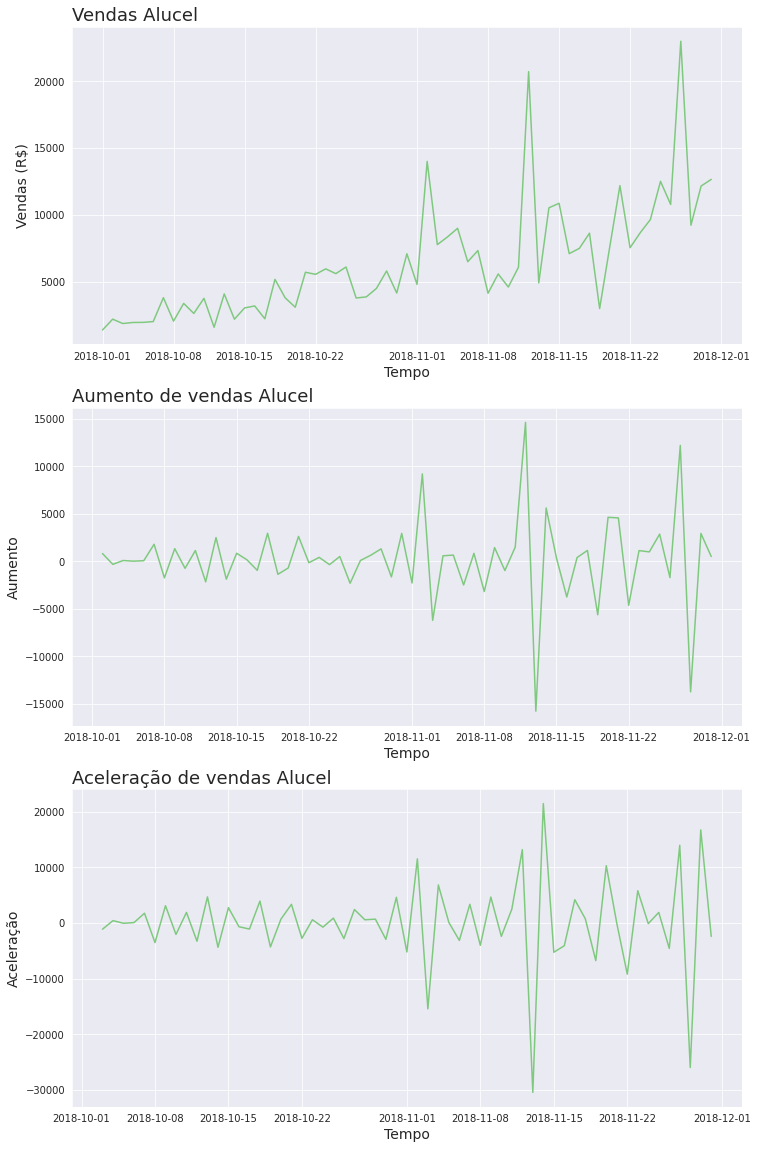

In [ ]:
ax = plt.figure(figsize=(12,6))
plt.subplot(3,1,1)

ax = sns.lineplot(x='dia', y='vendas', data=alucel)
ax.set_title('Vendas Alucel', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

plt.subplots_adjust(bottom=0.1, top=2.6)
plt.subplot(3,1,2)

ax = sns.lineplot(x='dia', y='aumento', data=alucel)
ax.set_title('Aumento de vendas Alucel', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

plt.subplots_adjust(bottom=0.1, top=2.6)
plt.subplot(3,1,3)

ax = sns.lineplot(x='dia', y='aceleracao', data=alucel)
ax.set_title('Aceleração de vendas Alucel', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aceleração', fontsize=14)
ax = ax

**Média Movel**

In [ ]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean() # Rolling função do pandas que calcula a média movel
alucel.head(14)

,dia,vendas,aumento,aceleracao,média_movel,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,2529.348571
